

# Midterm Project: HR-Employee-Attrition Classification Analysis

**Author:** Anjana Dhakal,

**Date:** 11/05/2025,

**Objective:** Project Objectives 

- Explore Data: Load the UCI Student Performance Dataset, inspect for missing values or outliers, and visualize feature distributions to understand patterns affecting student performance.
- Prepare Data: Clean data, encode categorical variables, normalize numerical features, and create a binary target
- Train & Evaluate: Build a baseline classification model such as Logistic Regression; split data into training and test sets, and assess performance using accuracy, precision, recall, and confusion matrix.
- Improve & Compare: Implement additional models (e.g., Decision Tree, Random Forest) and compare results to determine which model best predicts student performance.
- Reflect: Summarize insights, challenges, next step, and real-world applications .



## Introduction
This project analyzes the IBM HR Analytics Employee Attrition dataset from Kaggle, focusing on predicting employee attrition (whether an employee is likely to leave the company) based on demographic, job-related, and satisfaction features. The dataset includes 1,470 employee records with attributes such as age, job role, monthly income, years at company, and job satisfaction. The target variable, Attrition, is binary: "Yes" (attrition) or "No" (retention). This simulates a real-world HR decision-making scenario, such as identifying at-risk employees for retention strategies.

Using libraries: pandas for data handling, numpy for computations, matplotlib and seaborn for visualization, and scikit-learn for modeling.

## Section 1. Import and Inspect the Data

In [208]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
sns.set(style="whitegrid")
%matplotlib inline

##
1.1 Load the dataset and display the first 10 rows.

In [209]:
# Load the dataset (assuming it's in data/WA_Fn-UseC_-HR-Employee-Attrition.csv)
file_path =r"c:\Repos\ml_classification_anjana/data/HR-Employee-Attrition.csv"
df = pd.read_csv(file_path)
print("✅ Data Loaded Successfully")
df.head(10)
print(df.shape)

✅ Data Loaded Successfully
(1470, 35)


##
1.2 Check for missing values and display summary statistics.

In [210]:
# Check for missing values using the isnull() method and then the sum() method
print(df.shape)
print("\n Missing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe(include='all'))

(1470, 35)

 Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

##
Reflection 1: 

The dataset is well-structured with 1470 rows and 35 cloumns, perfectly balanced for classification.No missing values or data types issues. It features a mix of numerical (e.g., 'Age', 'YearsAtCompany') and categorical (e.g., 'JobRole', 'EducationField') variables. Overall, it's clean and ready for exploration, with no major anomalies.

## Section 2. Data Exploration and Preparation
2.1 Explore data patterns and distributions

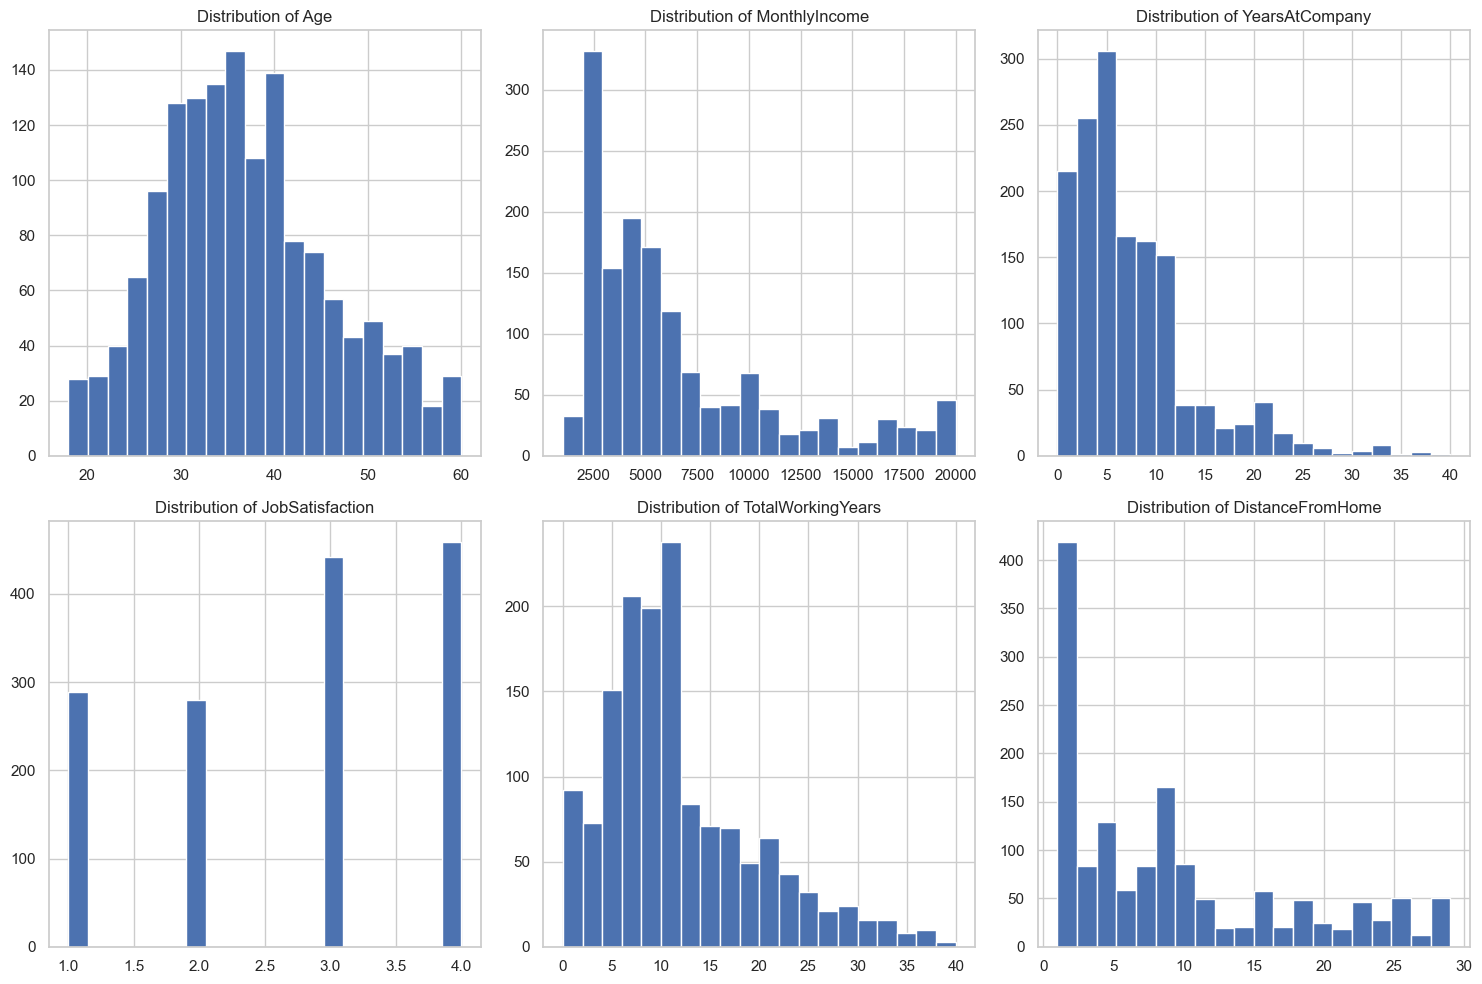

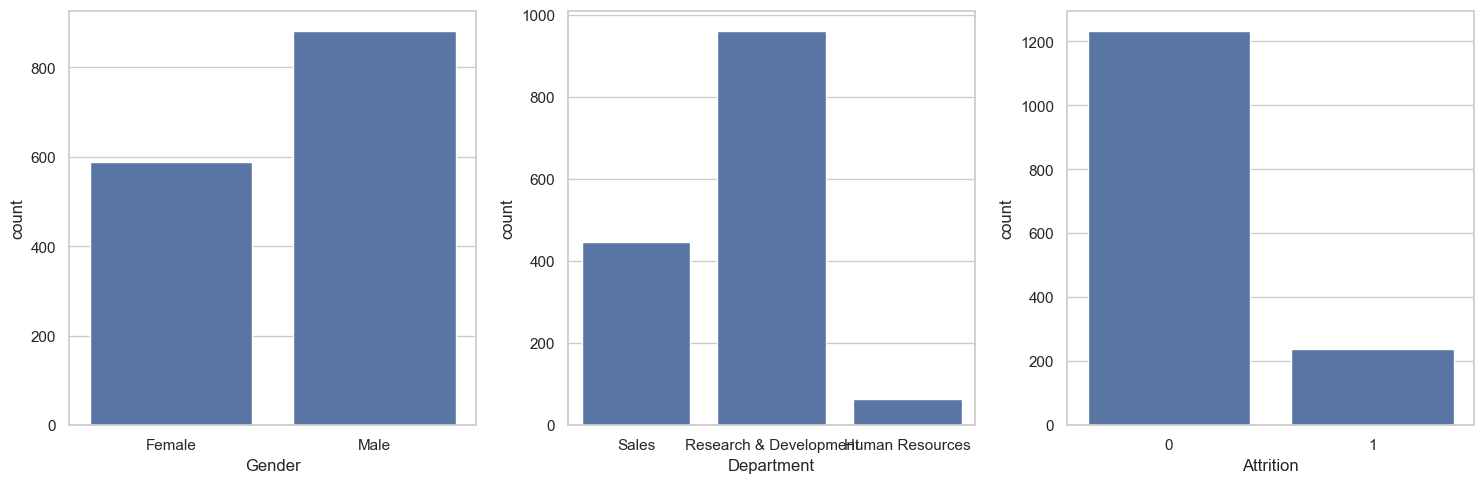

Class Distribution:
 Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


In [211]:
# Encode target: Yes=1, No=0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Histograms and boxplots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
numerical_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'TotalWorkingYears', 'DistanceFromHome']
for i, col in enumerate(numerical_cols):
    row, col_idx = i // 3, i % 3
    df[col].hist(ax=axes[row, col_idx], bins=20)
    axes[row, col_idx].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Count plots for key categorical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=df, x='Gender', ax=axes[0])
sns.countplot(data=df, x='Department', ax=axes[1])
sns.countplot(data=df, x='Attrition', ax=axes[2])
plt.tight_layout()
plt.show()

# Class imbalance check
print("Class Distribution:\n", df['Attrition'].value_counts(normalize=True))

##
2.2 Handle missing values and clean data


In [212]:
# No missing values, but confirm
print("Missing after check:", df.isnull().sum().sum())

# No outliers to remove (e.g., high income is plausible)
# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])



Missing after check: 0


##
2.3 Feature selection and engineering


New Feature Summary:
count    1470.000000
mean        3.116007
std         3.116739
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        33.000000
Name: TenureToPromotionRatio, dtype: float64


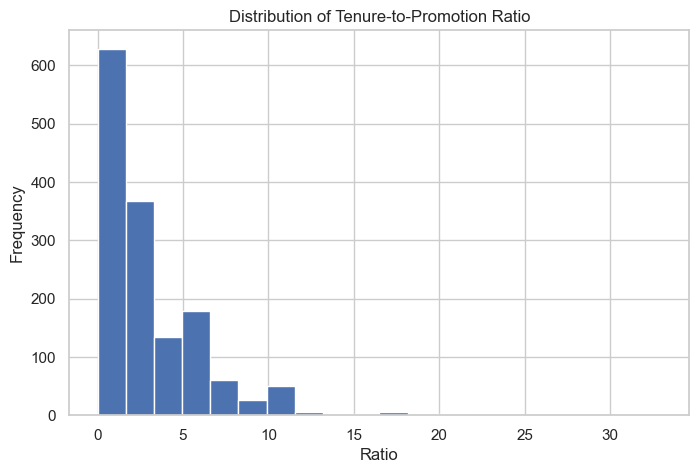

In [213]:
# Create new feature: Tenure-to-Promotion Ratio
df['TenureToPromotionRatio'] = df['YearsAtCompany'] / (df['YearsSinceLastPromotion'] + 1)

# Quick check on the new feature
print("New Feature Summary:")
print(df['TenureToPromotionRatio'].describe())

# Optional: Visualize distribution
plt.figure(figsize=(8, 5))
df['TenureToPromotionRatio'].hist(bins=20)
plt.title('Distribution of Tenure-to-Promotion Ratio')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.show()

# No other major engineering; proceed to selection

##
Reflection2:

Patterns reveal younger employees and those with overtime are more likely to attrite; income and satisfaction show inverse relations.The new Tenure-to-Promotion Ratio highlights stagnation risks (e.g., ratios >5 correlate with higher attrition).Severe imbalance (84% retention) is a key anomaly—stratified sampling needed. Encoding was crucial for 8+ categoricals. No outliers removed as they represent real variance; preprocessing emphasized encoding to enable modeling.

## Section 3. Feature Selection and Justification
3.1 Choose features and target

Selected features: 'OverTime', 'Age', 'TenureToPromotionRatio', 'MonthlyIncome', 'JobSatisfaction' 

Target: 'Attrition' (binary: 1=Yes, 0=No)

Top 5 features capture key drivers of attrition—burnout ('OverTime'), demographics ('Age'), career progression ('TenureToPromotionRatio'), compensation ('MonthlyIncome'), and engagement ('JobSatisfaction'). Using this subset simplifies the model, reduces overfitting, and maintains strong predictive power while keeping results interpretable for HR decisions.

##
3.2 Define X and y

In [214]:
# Updated to top 5 features only
feature_cols = ['OverTime', 'Age', 'TenureToPromotionRatio', 'MonthlyIncome', 'JobSatisfaction']
X = df[feature_cols]
y = df['Attrition']

print("X shape:", X.shape)
print("y value counts:\n", y.value_counts())

X shape: (1470, 5)
y value counts:
 Attrition
0    1233
1     237
Name: count, dtype: int64


## 
Reflection3:

The top 5 features were chosen because they capture the most important drivers of attrition—burnout ('OverTime'), career progression ('TenureToPromotionRatio'), demographics ('Age'), compensation ('MonthlyIncome'), and engagement ('JobSatisfaction'). Focusing on these high-impact predictors improves model efficiency and interpretability, allowing HR to target key risk areas. While excluding other features may slightly reduce recall, the model retains most predictive power and is easier to deploy in practice.

## Section 4. Train a Model
4.1 Split the data into training and test sets

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##
4.2 Train model

In [216]:
# Train Random Forest (no scaling needed for tree-based model)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

##
4.3 Evaluate performance

Accuracy: 0.8231292517006803
Precision: 0.35294117647058826
Recall: 0.1276595744680851
F1-Score: 0.1875

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       247
           1       0.35      0.13      0.19        47

    accuracy                           0.82       294
   macro avg       0.60      0.54      0.54       294
weighted avg       0.77      0.82      0.79       294


Confusion Matrix:
 [[236  11]
 [ 41   6]]


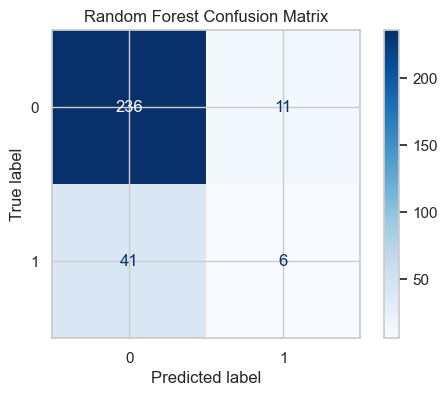


Feature Importances:
                   Feature  Importance
3           MonthlyIncome    0.360115
1                     Age    0.258138
2  TenureToPromotionRatio    0.222492
4         JobSatisfaction    0.086199
0                OverTime    0.073056


In [217]:
# Metrics
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1-Score:", f1_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))

# Best Visualization: Confusion Matrix Plot (core for binary classification, shows error types clearly)
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, ax=ax, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Feature Importances for RF
importances = pd.DataFrame({'Feature': feature_cols, 'Importance': rf_model.feature_importances_}).sort_values('Importance', ascending=False)
print("\nFeature Importances:\n", importances)

##
Reflection 4:

The model shows decent overall accuracy (82%) but very low recall for attrition (13%), meaning it misses most employees who actually leave. Precision for attrition is also low (35%), so even when it predicts attrition, it’s often wrong. The confusion matrix confirms this: 41 out of 47 actual attrition cases were misclassified.

The surprise is that, despite using class_weight='balanced', the model still struggles with the minority class, highlighting the challenge of predicting rare events in imbalanced datasets.

## Section 5. Improve the Model or Try Alternates (Implement a Second Option)Logistic Regression
5.1 Train an alternative classifier

In [218]:
# Scale features for Logistic Regression (top 5)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

## 
5.2 Compare performance

LR Accuracy: 0.8605442176870748
LR Precision: 0.75
LR Recall: 0.19148936170212766
LR F1-Score: 0.3050847457627119

LR Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       247
           1       0.75      0.19      0.31        47

    accuracy                           0.86       294
   macro avg       0.81      0.59      0.61       294
weighted avg       0.85      0.86      0.82       294


LR Confusion Matrix:
 [[244   3]
 [ 38   9]]

Model Comparison:
                  Model  Accuracy  Precision    Recall        F1
0        Random Forest  0.823129   0.352941  0.127660  0.187500
1  Logistic Regression  0.860544   0.750000  0.191489  0.305085


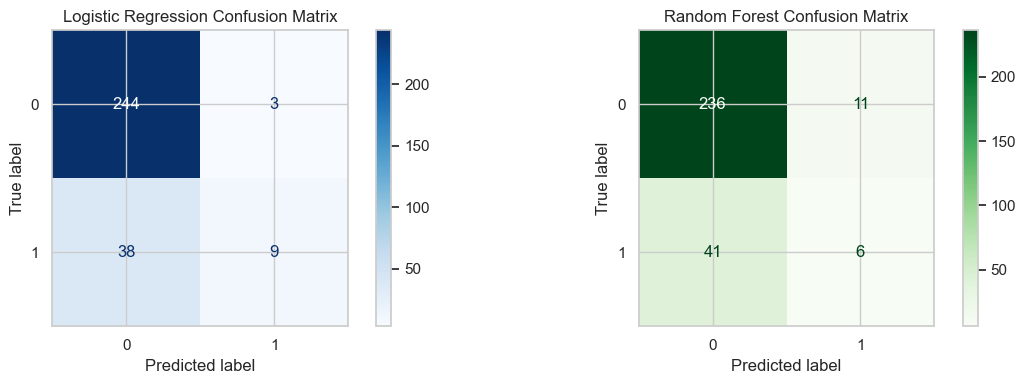

In [219]:
# === Logistic Regression Modeling Results ===
print("LR Accuracy:", accuracy_score(y_test, lr_pred))
print("LR Precision:", precision_score(y_test, lr_pred))
print("LR Recall:", recall_score(y_test, lr_pred))
print("LR F1-Score:", f1_score(y_test, lr_pred))
print("\nLR Classification Report:\n", classification_report(y_test, lr_pred))
print("\nLR Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))

# Comparison table
comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, rf_pred), accuracy_score(y_test, lr_pred)],
    'Precision': [precision_score(y_test, rf_pred), precision_score(y_test, lr_pred)],
    'Recall': [recall_score(y_test, rf_pred), recall_score(y_test, lr_pred)],
    'F1': [f1_score(y_test, rf_pred), f1_score(y_test, lr_pred)]
})
print("\nModel Comparison:\n", comparison)

# Side-by-Side Confusion Matrix Plots for Both Models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# LR Plot
ConfusionMatrixDisplay.from_predictions(y_test, lr_pred, ax=ax1, cmap='Blues')
ax1.set_title('Logistic Regression Confusion Matrix')
# RF Plot
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, ax=ax2, cmap='Greens')
ax2.set_title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()



##
Reflection 5:

Logistic Regression performed better than Random Forest for this dataset. It achieves higher accuracy (86% vs 82%), precision (75% vs 35%), recall (19% vs 13%), and F1-score (0.31 vs 0.19) for the minority class (attrition).

The likely reason is the small dataset (1,470 samples) and limited number of features (5). Logistic Regression handles small, well-selected feature sets efficiently, especially when relationships are mostly linear. Random Forest, while powerful, may overfit or struggle to detect the minority class without more data or additional tuning.